In [1]:
import math
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Read and Analyze the data

In [2]:
df = pd.read_csv('./Dataset/adult_data.csv', skipinitialspace = True)

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,Education-num,Marital-status,occupation,relationship,race,sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32561 Columns: 15


In [5]:
# Features data-type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [27]:
# Now, we check to see the missing values/data if any 
# df.isin('?') tells us about the missing values in the rows
rows_with_missing_values = sum(df.isin(['?']).sum(axis=1) > 0)
print ("Number of rows with at least 1 missing value = ", rows_with_missing_values)
print("% of rows with at least 1 missing value = {} %"
      .format(round(rows_with_missing_values / df.shape[0] * 100, 2)))

Number of rows with at least 1 missing value =  0
% of rows with at least 1 missing value = 0.0 %


In [7]:
# Check for empty data information sliced by columns 
round((df.isin(['?']).sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
Education-num      0.0 %
Marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
Capital-gain       0.0 %
Capital-loss       0.0 %
Hours-per-week     0.0 %
Native-country    1.79 %
income             0.0 %
dtype: object

In [28]:
# Remove rows with missing values
df = df[df.isin(['?']).sum(axis=1) == 0]
round((df.isin(['?']).sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
Education-num     0.0 %
Marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
Capital-gain      0.0 %
Capital-loss      0.0 %
Hours-per-week    0.0 %
Native-country    0.0 %
income            0.0 %
dtype: object

In [9]:
# Checking the counts of income categories
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.11 %
>50K     24.89 %
Name: income, dtype: object

In [10]:
# Compute the proportion of data points from each category of “Native-country.” for the top 10 countries.
print(df['Native-country'].value_counts().head(10)/df.shape[0])

United-States    0.911876
Mexico           0.020224
Philippines      0.006233
Germany          0.004244
Puerto-Rico      0.003614
Canada           0.003548
India            0.003315
El-Salvador      0.003315
Cuba             0.003050
England          0.002851
Name: Native-country, dtype: float64


In [11]:
# Because the native-country variable has too many categories, and most of the data points are from the US (~90%), 
# we combine all the categories except for “United-States” into the “Other” category
df.loc[df['Native-country']!='United-States', 'Native-country']='Other'

In [12]:
print(df['Native-country'].value_counts().head(10)/df.shape[0])
df.head(10)

United-States    0.911876
Other            0.088124
Name: Native-country, dtype: float64


,age,workclass,fnlwgt,education,Education-num,Marital-status,occupation,relationship,race,sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Other,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# One-Hot Encoding

In [13]:
# Now, we need to convert the categorical variables to dummy variables using one-hot encoding:

# We first separate the output column 'income' into Y and the remaining training columns into X.
# Then, we use the “get_dummies” function to turn all the categorical variables into binary dummy variables.
X = df.drop(['income', 'fnlwgt'], axis=1)
X = pd.get_dummies(X)
X.head(10)

,age,Education-num,Capital-gain,Capital-loss,Hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,Native-country_Other,Native-country_United-States
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,13,0,0,40,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
5,37,14,0,0,40,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
6,49,5,0,0,16,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7,52,9,0,0,45,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
8,31,14,14084,0,50,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
9,42,13,5178,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [14]:
# Y is the output label so it contains the income column. Map ">50K" to 1 and others to 0.
Y = df['income']
Y = Y.map({'>50K': 1, '<=50K': 0}).astype(int)
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

In [15]:
 print("Number of rows with output label <=50K = ", sum(Y==0),
       "\nNumber of rows with output label >50K = ", sum(Y==1))

Number of rows with output label <=50K =  22654 
Number of rows with output label >50K =  7508


# Model

In [16]:
def get_rf_model (x_train, y_train, n_trees, max_features):
    model = RandomForestClassifier(n_estimators=n_trees, 
                                   max_features=max_features, 
                                   oob_score=True) 
    model.fit(x_train, y_train)
    return model

def get_confusion_matrix(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Income <= 50K", "Income > 50K"])
    disp = disp.plot(include_values=True, cmap=plt.cm.Blues, values_format="d")
    disp.ax_.set_title("Confusion Matrix")
    plt.show()

def test_model (model, x_test, y_test):
    y_pred = model.predict(x_test)
    print('accuracy_score: ', accuracy_score(y_test, y_pred))
    print('model_oob_score: ', model.oob_score_)
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred))
    get_confusion_matrix(y_pred, y_test)

In [17]:
n_features = X.shape[1]
print(n_features)

64


# Run Different Models

accuracy_score:  0.9748690405145547
model_oob_score:  0.8395663417545256
precision:  0.9605622270742358
recall:  0.9375332978156633
f1_score:  0.9489080614720948


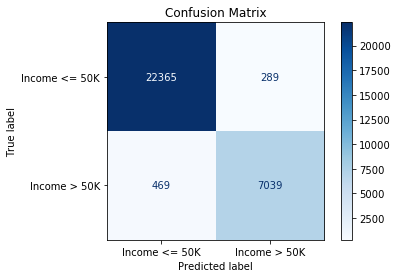

In [18]:
rf1 = get_rf_model(X, Y, n_trees=100, max_features=int(0.5 * math.sqrt(n_features)))
test_model(rf1, X, Y)

accuracy_score:  0.9749021948146674
model_oob_score:  0.8447384125721106
precision:  0.9622073120635355
recall:  0.9359350026638252
f1_score:  0.9488893390047938


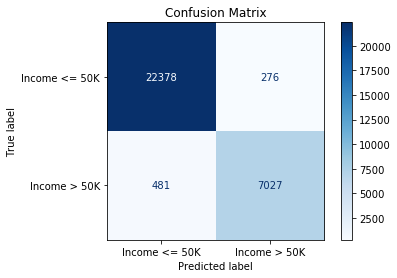

In [19]:
rf2 = get_rf_model(X, Y, n_trees=500, max_features=int(math.sqrt(n_features)))
test_model(rf2, X, Y)

accuracy_score:  0.9749021948146674
model_oob_score:  0.8460645845766196
precision:  0.9655219969659358
recall:  0.9324720298348428
f1_score:  0.9487092621451317


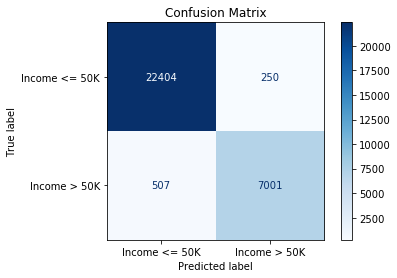

In [20]:
rf3 = get_rf_model(X, Y, n_trees=1000, max_features=int(2 * math.sqrt(n_features)))
test_model(rf3, X, Y)

# Feature importance for best model

In [21]:
import numpy as np

def get_important_features (model, train, n):
    top_feature_indices = np.argsort(model.feature_importances_)[-n:].tolist()
    top_feature_indices.reverse()
    top_features = [(train.columns[idx], model.feature_importances_[idx]) for idx in top_feature_indices]
    return top_features

def print_top_features (features):
    for feature in features:
        print(feature)

def plot_top_features (features):
    feature_names = [feature[0] for feature in features]
    importance_values = [feature[1] for feature in features]
    plt.barh(feature_names, importance_values)

('age', 0.24890214296739296)
('Hours-per-week', 0.11857779278624996)
('Capital-gain', 0.10065258731116941)
('Marital-status_Married-civ-spouse', 0.06425008311222445)
('Education-num', 0.05647405479350596)
('Capital-loss', 0.034660257361137536)
('relationship_Husband', 0.030361252065054845)
('Marital-status_Never-married', 0.029386576113687408)
('occupation_Exec-managerial', 0.020667332337500264)
('occupation_Prof-specialty', 0.016635904983584637)


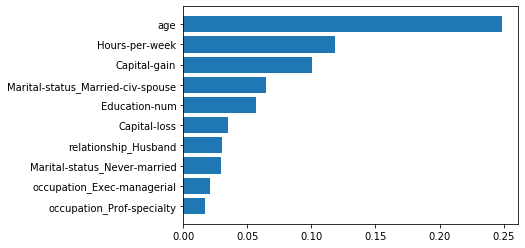

In [22]:
top_features = get_important_features(rf1, X, n=10)
print_top_features(top_features)
plot_top_features(top_features[::-1])

# Retrain model with top 5 features

In [23]:
X_top5 = X[["age", "Hours-per-week", "Capital-gain", "Education-num", "Marital-status_Married-civ-spouse"]]
Y_top5 = Y # no change in Y

In [24]:
X_top5.head(10)

,age,Hours-per-week,Capital-gain,Education-num,Marital-status_Married-civ-spouse
0,39,40,2174,13,0
1,50,13,0,13,1
2,38,40,0,9,0
3,53,40,0,7,1
4,28,40,0,13,1
5,37,40,0,14,1
6,49,16,0,5,0
7,52,45,0,9,1
8,31,50,14084,14,0
9,42,40,5178,13,1


accuracy_score:  0.8970227438498773
model_oob_score:  0.8293216630196937
precision:  0.8299850074962519
recall:  0.7373468300479489
f1_score:  0.7809281986175766


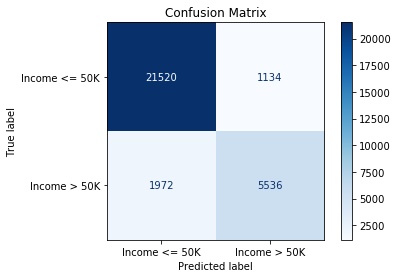

In [29]:
rf_top5 = get_rf_model(X_top5, Y_top5, n_trees=100, max_features=0.5*int(math.sqrt(5)))
test_model(rf_top5, X_top5, Y_top5)